In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor(), download=True)

In [3]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


1


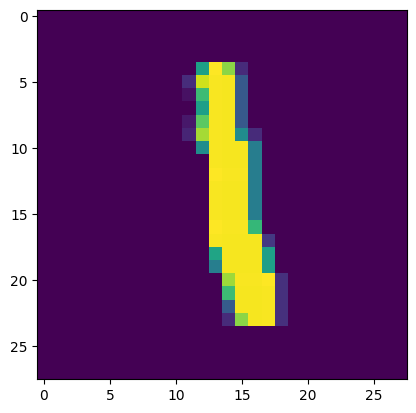

In [4]:
mnist_dataset[0][0].numpy()[0].shape
plt.imshow(mnist_dataset[6][0].numpy()[0])
print(mnist_dataset[6][1])

In [5]:
train_data, validation_data = random_split(mnist_dataset, [48000, 12000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  48000
length of Validation Datasets:  12000


In [6]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [7]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0075,  0.0106, -0.0258,  ...,  0.0094, -0.0047,  0.0075],
        [ 0.0025, -0.0137, -0.0203,  ...,  0.0004, -0.0111,  0.0027],
        [-0.0192,  0.0106, -0.0038,  ..., -0.0132, -0.0339,  0.0110],
        ...,
        [-0.0102, -0.0308,  0.0313,  ...,  0.0188, -0.0188, -0.0011],
        [-0.0062, -0.0118,  0.0080,  ..., -0.0097, -0.0022,  0.0104],
        [ 0.0300, -0.0176,  0.0170,  ...,  0.0257,  0.0214,  0.0197]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0242, -0.0100,  0.0065, -0.0002, -0.0076, -0.0325, -0.0081, -0.0293,
        -0.0262,  0.0305], requires_grad=True)


In [8]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return out

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0100, -0.0074,  0.0086,  ..., -0.0247,  0.0053, -0.0249],
         [ 0.0134, -0.0200,  0.0040,  ..., -0.0159,  0.0285, -0.0285],
         [ 0.0251,  0.0150, -0.0142,  ...,  0.0050,  0.0278, -0.0142],
         ...,
         [ 0.0051,  0.0104, -0.0025,  ..., -0.0194,  0.0333, -0.0117],
         [-0.0082, -0.0163,  0.0195,  ...,  0.0315,  0.0074,  0.0297],
         [-0.0258,  0.0266,  0.0217,  ...,  0.0191, -0.0041, -0.0031]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0014, -0.0029, -0.0133,  0.0212, -0.0228, -0.0160, -0.0251,  0.0187,
          0.0002,  0.0140], requires_grad=True)]

In [9]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-3.0921e-02, -1.5673e-01,  5.4140e-02, -8.4525e-02,  2.3353e-01,
          4.4029e-01,  9.8093e-02, -1.9977e-01, -1.9435e-01,  8.0753e-02],
        [ 1.7939e-02,  2.0223e-01, -2.9829e-01, -2.5551e-01, -1.1303e-01,
          2.7625e-01, -3.2830e-01, -2.7898e-01, -1.6298e-01, -2.2456e-01],
        [-2.0453e-01,  1.5807e-01, -1.6607e-01, -1.1365e-01,  9.3346e-02,
          2.9830e-01, -4.1675e-02,  1.7348e-01, -4.3310e-01, -2.0497e-01],
        [-7.0291e-02,  1.2446e-01, -2.1182e-01, -2.1206e-01, -2.1289e-01,
          2.2304e-01, -1.6117e-01, -7.1248e-02, -1.0791e-01, -2.7566e-01],
        [-1.2180e-01, -2.3279e-01, -3.0349e-01, -1.2501e-01,  3.6106e-01,
          1.3200e-01,  2.0108e-01, -2.4704e-02, -2.3177e-01,  4.8617e-02],
 

In [10]:
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0928, 0.0819, 0.1011, 0.0880, 0.1209, 0.1487, 0.1056, 0.0784, 0.0788,
         0.1038],
        [0.1119, 0.1346, 0.0816, 0.0852, 0.0982, 0.1449, 0.0792, 0.0832, 0.0934,
         0.0878]])


Sum:  1.0


tensor([5, 5, 5, 5, 4, 4, 5, 6, 1, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 5, 5, 5, 9, 4,
        6, 1, 5, 5, 5, 5, 5, 1])


tensor([0.1487, 0.1449, 0.1377, 0.1362, 0.1447, 0.1228, 0.1343, 0.1280, 0.1367,
        0.1401, 0.1260, 0.1254, 0.1193, 0.1293, 0.1578, 0.1320, 0.1273, 0.1129,
        0.1471, 0.2074, 0.1318, 0.1227, 0.1166, 0.1218, 0.1270, 0.1344, 0.1323,
        0.1450, 0.1257, 0.1327, 0.1498, 0.1330], grad_fn=<MaxBackward0>)


In [11]:
labels


tensor([7, 6, 8, 6, 9, 9, 3, 3, 4, 3, 1, 1, 3, 1, 0, 0, 7, 6, 6, 0, 8, 6, 3, 5,
        3, 9, 4, 6, 0, 1, 0, 4])

In [12]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss.item())

Accuracy:  tensor(0.)


Loss Function:  <function cross_entropy at 0x000001EE980D8F40>


2.368177890777588


In [13]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 400),
            nn.Linear(400, 200),
            nn.Linear(200, num_classes)
        )
        

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.layers(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss':loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()}

    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()


In [14]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):

        ## Training Phas
        for batch in train_loader:
            optimizer.zero_grad()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [15]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.322331428527832, 'val_acc': 0.10474999994039536}

In [16]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9756, val_acc: 0.6855
Epoch [1], val_loss: 1.4249, val_acc: 0.7203
Epoch [2], val_loss: 0.9653, val_acc: 0.7861
Epoch [3], val_loss: 0.7341, val_acc: 0.8310
Epoch [4], val_loss: 0.6117, val_acc: 0.8463


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

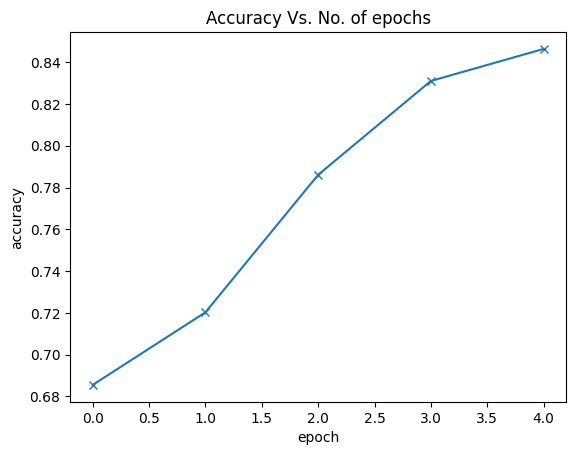

In [17]:
accuracies = [result['val_acc'] for result in history1]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')

Text(0.5, 1.0, 'Loss Vs. No. of epochs')

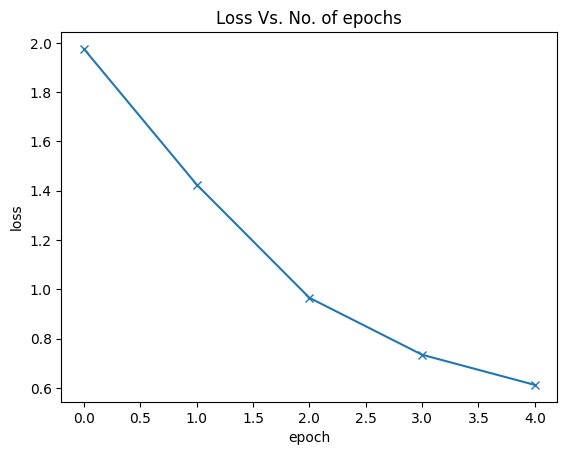

In [18]:
losses = [result['val_loss'] for result in history1]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Vs. No. of epochs')

#Test

In [19]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

shape:  torch.Size([1, 28, 28])
Label:  7


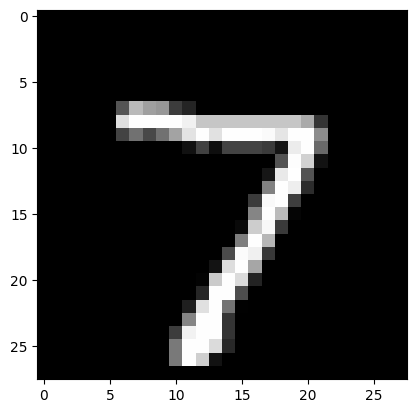

In [20]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [21]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [22]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 8 , Predicted : 7


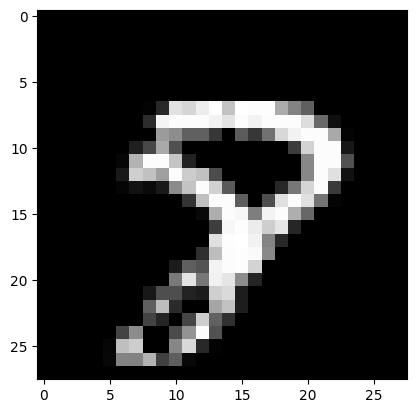

In [23]:
img, label = test_dataset[6555]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

In [24]:
torch.save(model.state_dict(), 'mnist-logistic.pth')